In [7]:
# -*- encoding: utf-8 -*-
import sklearn.cross_validation
import sklearn.datasets
import sklearn.metrics

import autosklearn.classification

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from features import df_to_features, round_up_rows
from visualization import plot_ROC_curve

from sklearn.cross_validation import StratifiedKFold, StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler

In [30]:
nrows = 500000
features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv", nrows=nrows)
features_df = round_up_rows(features_df)

# features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv")

In [31]:
mini_df = features_df
nfeatures = mini_df.shape[1] - 2
X = mini_df.iloc[:, :nfeatures].as_matrix()
Y = mini_df.IS_LAUGHTER.as_matrix()
y = Y

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X.shape

(499400, 102)

In [21]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=600, per_run_time_limit=120, ml_memory_limit=6000,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 5},
    seed=42)

# fit() changes the data in place, but refit needs the original data. We
# therefore copy the data. In practice, one should reload the data
automl.fit(X.copy(), y.copy())

print(automl.show_models())

[WARNING] [2017-04-29 19:49:03,250:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:49:03,250:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:49:03,254:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:49:03,254:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:49:03,256:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:49:03,256:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:53:05,475:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:53:05,475:intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-04-29 19:53:05,478:intensifier] Challeng

In [22]:
pd.DataFrame(automl.cv_results_)

mean_fit_time  mean_test_score param_balancing:strategy  \
0      93.283168         0.974828                     none   
1     120.017932         0.000000                weighting   
2     120.014477         0.000000                weighting   
3      79.364975         0.994222                     none   
4      69.791566         0.971758                     none   
5      96.142731         0.000000                     none   

  param_classifier:__choice__  param_classifier:adaboost:algorithm  \
0               random_forest                                  NaN   
1                         sgd                                  NaN   
2                  libsvm_svc                                  NaN   
3         k_nearest_neighbors                                  NaN   
4          passive_aggressive                                  NaN   
5           gradient_boosting                                  NaN   

   param_classifier:adaboost:learning_rate  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   

   param_classifier:adaboost:max_depth  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
5                                  NaN   

   param_classifier:adaboost:n_estimators  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                                     NaN   

   param_classifier:bernoulli_nb:alpha  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
5                                  NaN   

   param_classifier:bernoulli_nb:fit_prior   ...     \
0                                      NaN   ...      
1                                      NaN   ...      
2                                      NaN   ...      
3                                      NaN   ...      
4                                      NaN   ...      
5                                      NaN   ...      

   param_preprocessor:random_trees_embedding:n_estimators  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        
5                                                NaN        

   param_preprocessor:select_percentile_classification:percentile  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                
5                                                NaN                

   param_preprocessor:select_percentile_classification:score_func  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                
5                                                NaN                

   param_preprocessor:select_rates:alpha  \
0                     

In [23]:
pd.DataFrame(automl.grid_scores_)

parameters  mean_validation_score  \
0  {'balancing:strategy': 'none', 'classifier:ran...               0.974828   
1  {'balancing:strategy': 'weighting', 'classifie...               0.000000   
2  {'classifier:libsvm_svc:tol': 5.01850298414320...               0.000000   
3  {'balancing:strategy': 'none', 'classifier:k_n...               0.994222   
4  {'balancing:strategy': 'none', 'classifier:pas...               0.971758   
5  {'balancing:strategy': 'none', 'classifier:gra...               0.000000   

  cv_validation_scores  
0     [0.974828282828]  
1                [0.0]  
2                [0.0]  
3     [0.994222222222]  
4     [0.971757575758]  
5                [0.0]

In [24]:
# During fit(), models are fit on individual cross-validation folds. To use
# all available data, we call refit() which trains all models in the
# final ensemble on the whole dataset.
automl.refit(X.copy(), y.copy())

AutoML(acquisition_function='EI', backend=None, configuration_mode=None,
    debug_mode=None, delete_output_folder_after_terminate=None,
    delete_tmp_folder_after_terminate=None, disable_evaluator_output=None,
    ensemble_nbest=None, ensemble_size=None, exclude_estimators=None,
    exclude_preprocessors=None, include_estimators=None,
    include_preprocessors=None,
    initial_configurations_via_metalearning=None, keep_models=None,
    log_dir=None, max_iter_smac=None, metadata_directory=None,
    ml_memory_limit=None, per_run_time_limit=None, precision=32,
    resampling_strategy=None, resampling_strategy_arguments=None,
    seed=None, shared_mode=None, time_left_for_this_task=None)

In [34]:
skf = StratifiedKFold(y, n_folds=5, random_state=42)
for train_index, test_index in skf:
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    predictions = automl.predict_proba(X_test)
#     print(predictions)
#     print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))
    print("AUC", sklearn.metrics.roc_auc_score(y_test, predictions[:, 1]))

AUC 0.910594900373
AUC 0.845671282761
AUC 0.851910222852
AUC 0.859995238079
AUC 0.878128741083


In [35]:
predictions

array([[  8.17641161e-01,   1.82358839e-01],
       [  9.19179389e-01,   8.08206107e-02],
       [  9.11882301e-01,   8.81176990e-02],
       ..., 
       [  9.97042966e-01,   2.95703357e-03],
       [  9.85992427e-01,   1.40075730e-02],
       [  9.99367998e-01,   6.32002225e-04]])

In [37]:
predictions = predictions = automl.predict_proba(X)

/home/kurbanov/anaconda3/envs/autolearn-env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


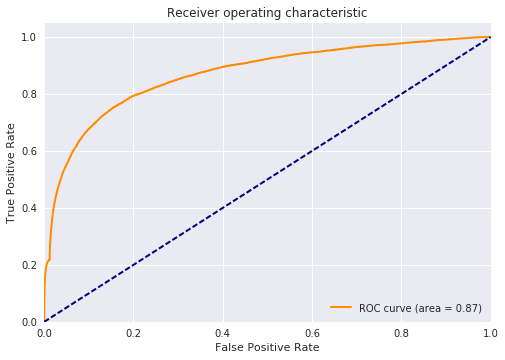

In [38]:
plot_ROC_curve(predictions[:, 1], y)

In [39]:
automl

AutoSklearnClassifier(configuration_mode='SMAC',
           delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_nbest=50,
           ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, include_estimators=None,
           include_preprocessors=None,
           initial_configurations_via_metalearning=25,
           ml_memory_limit=6000, output_folder=None,
           per_run_time_limit=120, resampling_strategy='cv',
           resampling_strategy_arguments={'folds': 5}, seed=42,
           shared_mode=False, time_left_for_this_task=600, tmp_folder=None)

In [42]:
# from sklearn.externals import joblib
# joblib.dump(automl, '../models/AutoSklearnClassifier_0.5kk_pyAA10.pkl') 

In [45]:
import pickle
pickle.dump(automl, open( '../models/AutoSklearnClassifier_0.5kk_pyAA10.pickle', "wb" ) )